### EMOTION DETECTION PROJECT

## Importing important libraries

In [1]:
import matplotlib.pyplot as plt
import cv2
from glob import glob
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

2024-05-30 08:29:02.619741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 08:29:02.619831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 08:29:02.744057: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version: 2.15.0


## Exploring Dataset

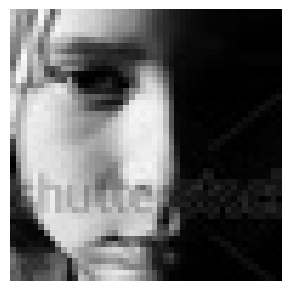

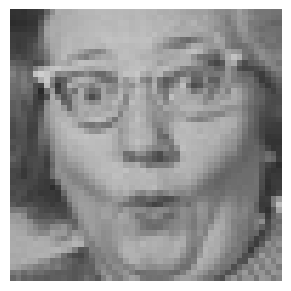

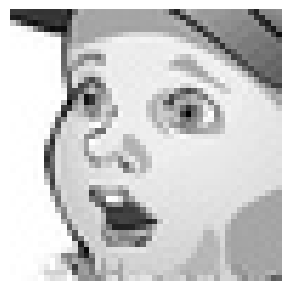

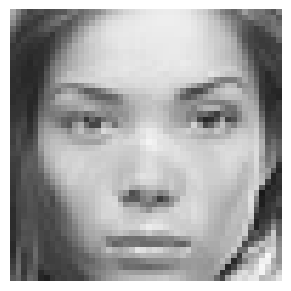

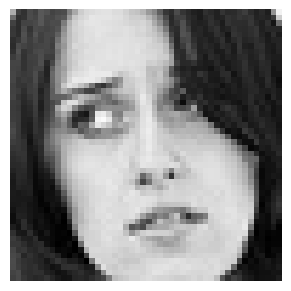

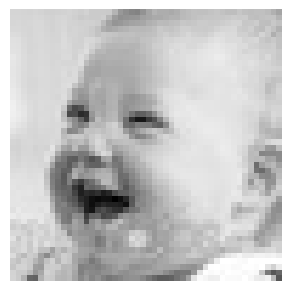

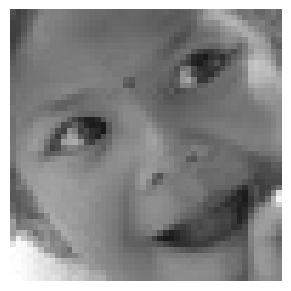

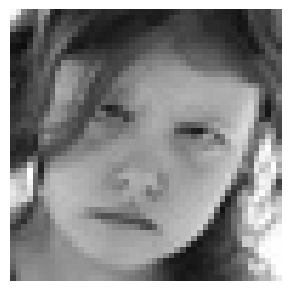

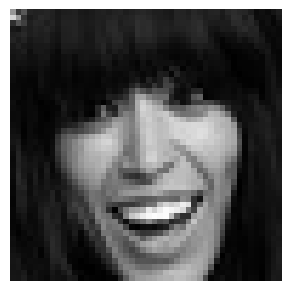

In [2]:
images= glob("/kaggle/input/fer2013/train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

## Prepare the data for training

In [3]:
img_size= 48
batch_size= 64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("/kaggle/input/fer2013/train/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)

datagen_train=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/kaggle/input/fer2013/test/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Defining model

In [4]:
def Convolution(input_tensor,filters,kernel_size):
    x= Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)

    return x

In [5]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)

    return x
    

In [6]:
def model_fer(input_shape):
    inputs= Input(input_shape)
    conv_1= Convolution(inputs,64,(3,3))
    conv_2= Convolution(inputs,128,(5,5))
    conv_3= Convolution(inputs,512,(3,3))
    conv_4= Convolution(inputs,512,(3,3))

    flatten= Flatten()(conv_4)
    
    dense_1=Dense_f(flatten,256)
    dense_2=Dense_f(dense_1,512)
    
    output= Dense(7,activation="softmax")(dense_2)
    model= Model(inputs= [inputs],outputs=[output])
    
    opt = Adam(learning_rate=0.0005)

    model.compile(loss=['categorical_crossentropy'],optimizer=opt, metrics=['accuracy'])
    return model

In [7]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 512)    │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 48, 48, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 24, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 294912)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    75,497,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,643,143 (288.56 MB)

 Trainable params: 75,640,583 (288.55 MB)

 Non-trainable params: 2,560 (10.00 KB)

## INITIALIZING THE MODEL

In [8]:
epochs = 15  # you can increase the number of epochs if needed
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001)
callbacks = [checkpoint,reduce_lr]


## TRAINING OUR MODEL

In [9]:
history=model.fit(x=train_generator,steps_per_epoch=steps_per_epoch,epochs=epochs
                  ,validation_data=validation_generator,validation_steps=validation_steps
                  ,callbacks=callbacks)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:32:48 12s/step - accuracy: 0.1406 - loss: 2.6161

I0000 00:00:1717057784.300325      93 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.2975 - loss: 1.8836
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 167s 345ms/step - accuracy: 0.2976 - loss: 1.8833 - val_accuracy: 0.2249 - val_loss: 2.0273 - learning_rate: 5.0000e-04
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.3906 - loss: 1.5567

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3906 - loss: 1.5567 - val_accuracy: 0.2000 - val_loss: 1.7214 - learning_rate: 5.0000e-04
Epoch 3/15
447/448 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4168 - loss: 1.5187
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.4169 - loss: 1.5186 - val_accuracy: 0.4092 - val_loss: 1.5791 - learning_rate: 5.0000e-04
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4219 - loss: 1.4893
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4219 - loss: 1.4893 - val_accuracy: 0.2000 - val_loss: 2.0080 - learning_rate: 5.0000e-04
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4687 - loss: 1.3877
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.4687 - loss: 1.3877 - val_accuracy: 0.4096

## MODEL EVALUATION

In [10]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.5255 - loss: 1.2410


[1.2379429340362549, 0.5270270109176636]

## Plotting Loss

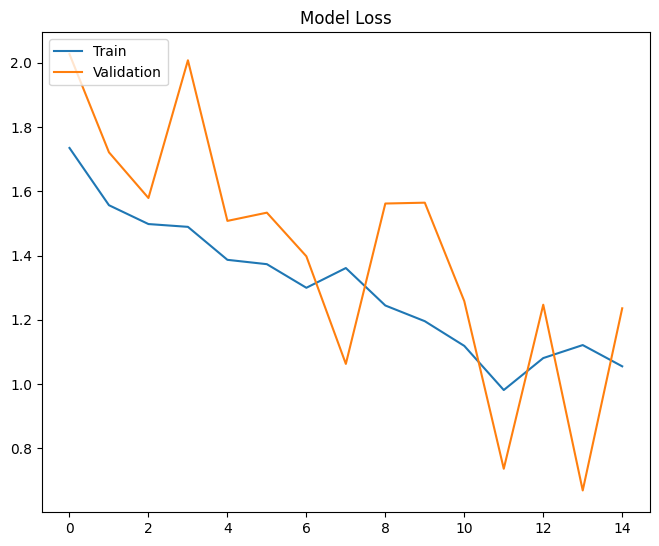

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0,right=0.95, left=0.0,hspace=0.25,wspace=0.35)

## Plot accuracy

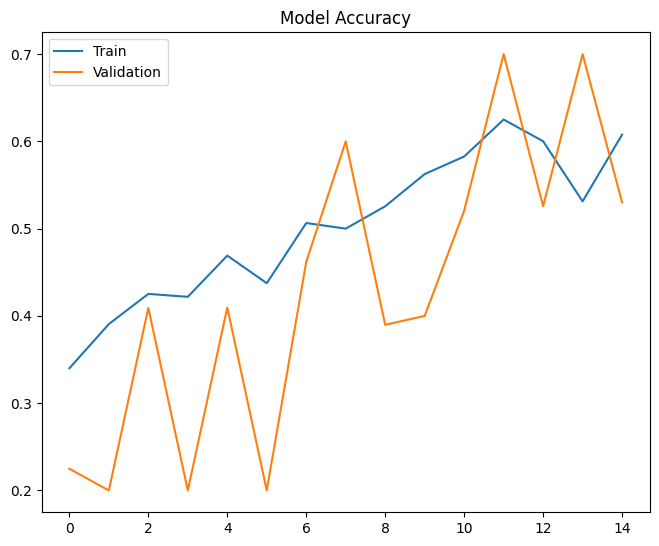

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0,right=0.95, left=0.0,hspace=0.25,wspace=0.35)

## Saving the model

In [16]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)

In [ ]:
import pandas as pd
filename = "/kaggle/input/your_file.json"
df = pd.read_json(filename)
df.head()